In [1]:
import numpy as np
import pandas as pd
import tables
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Parsing

In [2]:
data_dir = '/Users/murad/coding/Act_recog/'
data = os.path.join(data_dir, 'hunt4training.h5')
f = tables.open_file(filename=data, mode="r")
print(f)

/Users/murad/coding/Act_recog/hunt4training.h5 (File) ''
Last modif.: 'Fri Sep 14 12:00:12 2018'
Object Tree: 
/ (RootGroup) ''
/originial_data (Group) ''
/originial_data/table (Table(10901356,)) ''
/originial_data_textlabels (Group) ''
/originial_data_textlabels/table (Table(10901356,)) ''



In [3]:
data_table = f.root.originial_data.table.read()
data_table = pd.DataFrame(data_table)
data_table.head()

,index,x_back,y_back,z_back,x_thigh,y_thigh,z_thigh,label,subject
0,0,-7.500244,0.437988,-0.418457,-0.504883,0.138916,-0.364746,6,b'006'
1,1,-0.773926,0.649170,1.215576,-0.474365,0.088623,-0.245850,6,b'006'
2,2,-0.550537,-0.094238,0.201172,-0.424072,0.011719,-0.120605,6,b'006'
3,3,-0.625244,0.548096,0.292480,-0.358643,-0.127686,-0.036865,6,b'006'
4,4,-0.768311,0.230469,0.093994,-0.392090,-0.279785,0.030029,6,b'006'


In [4]:
data_with_textlabels = f.root.originial_data_textlabels.table.read()
data_with_textlabels = pd.DataFrame(data_with_textlabels)
data_with_textlabels.head()

,index,x_back,y_back,z_back,x_thigh,y_thigh,z_thigh,label,subject
0,0,-7.500244,0.437988,-0.418457,-0.504883,0.138916,-0.364746,b'standing',b'006'
1,1,-0.773926,0.649170,1.215576,-0.474365,0.088623,-0.245850,b'standing',b'006'
2,2,-0.550537,-0.094238,0.201172,-0.424072,0.011719,-0.120605,b'standing',b'006'
3,3,-0.625244,0.548096,0.292480,-0.358643,-0.127686,-0.036865,b'standing',b'006'
4,4,-0.768311,0.230469,0.093994,-0.392090,-0.279785,0.030029,b'standing',b'006'


In [5]:
assert data_table['label'].nunique() == data_with_textlabels['label'].nunique()
n_labels = data_table['label'].nunique()
n_subjects = data_table['subject'].nunique()
numeric_labels = data_table['label'].unique()
text_labels =data_with_textlabels['label'].unique()
text_labels =np.array([label.decode('utf-8') for label in text_labels])
labels=sorted(list(zip(text_labels,numeric_labels)), key=lambda x: x[1])
labels_sorted = [label[0] for label in labels]
print('Data was collected from %d subjects, with %d different types of activities.' %(n_subjects, n_labels))
print('\nThe activities are: \n',labels)

Data was collected from 15 subjects, with 19 different types of activities.

The activities are: 
 [('walking', 1), ('running', 2), ('shuffling', 3), ('stairs (ascending)', 4), ('stairs (descending)', 5), ('standing', 6), ('sitting', 7), ('lying', 8), ('transition', 9), ('bending', 10), ('picking', 11), ('undefined', 12), ('cycling (sit)', 13), ('cycling (stand)', 14), ('heel drop', 15), ('vigorous activity', 16), ('non-vigorous activity', 17), ('Transport (sitting)', 18), ('Commute (standing)', 19)]


## Plotting

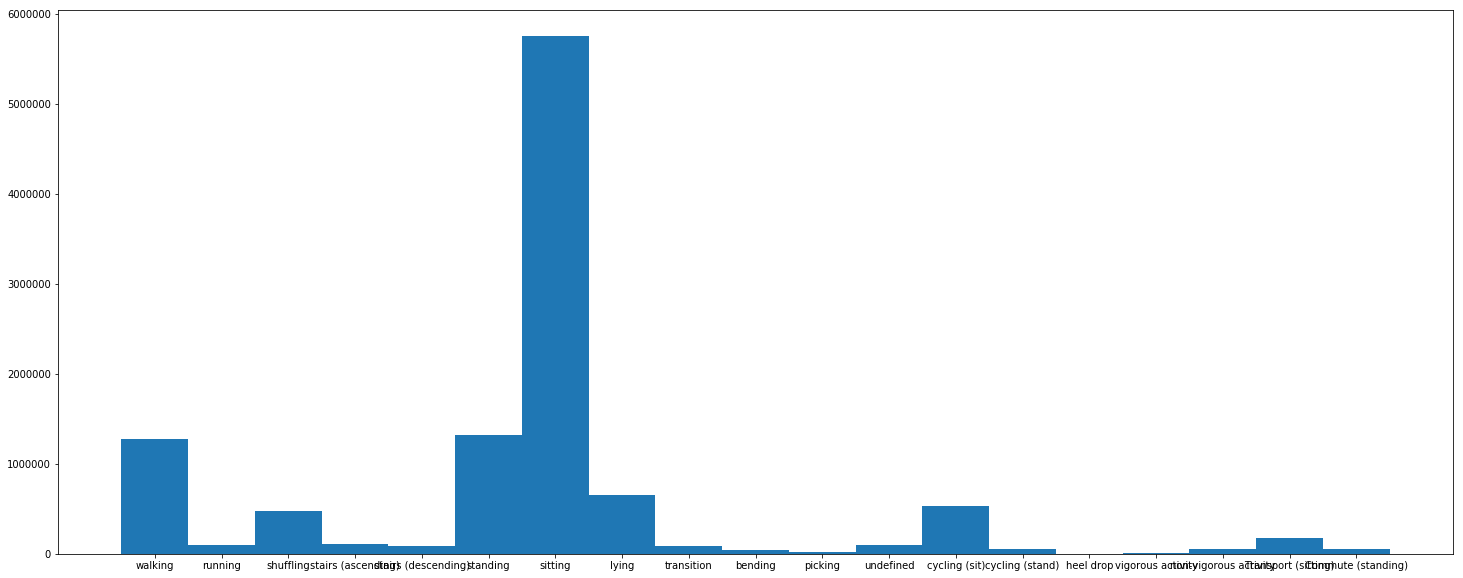

In [10]:
plt.figure(figsize=(25,10))
n, bins, _ = plt.hist(data_table['label'],
                      bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                      align='left')
# n, bins, _ = plt.hist(data_table['label'],
#                       bins=n_labels+1,
#                       align='left')
plt.xticks(range(1,20), labels_sorted)
plt.savefig('data_hist.pdf')
plt.show()

## Storrig

In [ ]:
# save to csv
data_table.to_csv('data_table.csv')
data_textlabels.to_csv('data_textlabels.csv')

In [ ]:
modified_data = os.path.join(data_dir,"modified.data.h5")
hdf = pd.HDFStore(path=modified_data, mode='w')

In [ ]:
data_table['subject'] =data_table['subject'].apply(lambda x: x.decode('utf-8'))

In [ ]:
hdf.put(key="data_table", value=data_table, format='table', data_columns=True)
#hdf.put(key="data_with_text_labels", value=data_with_textlabels, format='table', data_columns=True)